## Pre-processing Stages
**We try different pre-processing technique and experiment with the results to finally stick with a set of pre-processing steps (as our algorithm) along with justifications.**  

**1. Missing value handling**
1. `Interpolation`
2. Imputation
3. Other
4. Why use this specific technique?
    
**2. Scaling data with different magnitude to a common ground**
1. Continuous Data
    1. `Min Max Scaling [0...1]`
    2. Standardization (Z-Score Normalization)
    3. Normalization
    4. Other
    5. Why use this specific technique?
2. Categorical Data
    1. `One Hot Encoding`
    2. Multi-label Binarizer
    3. Other
    4. Why use this specific technique?
3. Hybrid Approach to Select Feature (from Paper)
    
**3. Slicing/Windowing**
1. 50,100,`200` etc. Define as Hyperparameter?
2. Other
3. Why use this specific technique?
    
**4. Wavelet Transformation**
1. Different Alogorithms
2. Alternatives
3. `First-order derivative for each feature.`
4. Why use this specific technique?

## Pre-processing

**`sklearn.preprocessing.StandardScaler`**   
Standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:

$ z = (x - u) / s $, where `u` is the mean of the training samples or zero if `with_mean=False`, and `s` is the standard deviation of the training samples or one if `with_std=False`.

In [1]:
from sklearn.preprocessing import StandardScaler

train = [[0, 2300], [1, 2500], [1, 3700], [2, 4000], [3, 4200], [7, 8000], [9, 9999]]

scaler = StandardScaler()
scaler.fit(train)
print(scaler.transform(train), '\n')

test = [[2, 2]]
print(scaler.transform(test))

[[-1.04330119 -0.98584278]
 [-0.72577474 -0.91163557]
 [-0.72577474 -0.46639231]
 [-0.40824829 -0.3550815 ]
 [-0.09072184 -0.28087429]
 [ 1.17938395  1.12906269]
 [ 1.81443685  1.87076375]] 

[[-0.40824829 -1.83848362]]


**`sklearn.preprocessing.SimpleImputer`**   
Imputation transformer for completing missing values.   
For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.   

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

The following snippet demonstrates how to replace missing values, encoded as np.nan, using the mean value of the columns (axis 0) that contain the missing values:

In [0]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train = [[1, 2], [np.nan, 3], [7, 6], [2,3], [9, np.nan], [0, 0]]
imp.fit(train)  
print(imp.transform(train), '\n')  

test = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(test))  

[[1.  2. ]
 [3.8 3. ]
 [7.  6. ]
 [2.  3. ]
 [9.  2.8]
 [0.  0. ]] 

[[3.8 2. ]
 [6.  2.8]
 [7.  6. ]]


**`sklearn.preprocessing.LabelBinarizer`**   
Binarize labels in a one-vs-all fashion.   
Several regression and binary classification algorithms are available in scikit-learn. A simple way to extend these algorithms to the multi-class classification case is to use the so-called one-vs-all scheme.

In [0]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train = [1, 2, 6, 4, 2, 6, 6, 6, 2, 2, 1, 1]
lb.fit(train)
print(lb.transform(train), '\n')

test = [1, 6, 7]
print(lb.transform(test))

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]] 

[[1 0 0 0]
 [0 0 0 1]
 [0 0 0 0]]


**`sklearn.preprocessing.LabelEncoder`**   
Encode labels with value between 0 and n_classes-1.

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data = [1, 2, 2, 6, 4, 4, 7, 8, 9, 10]
le.fit(data)
print(le.classes_, '\n')
print(le.transform(data))

print(le.inverse_transform([0, 0, 1, 2]))

[ 1  2  4  6  7  8  9 10] 

[0 1 1 3 2 2 4 5 6 7]
[1 1 2 4]


**`sklearn.preprocessing.OneHotEncoder`**   
Encode categorical features as a one-hot numeric array.   


In [0]:
from numpy import argmax
from sklearn.preprocessing import OneHotEncoder

data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
data_reshaped = np.array(data).reshape(-1, 1)

onehot_encoder.fit(data_reshaped)
onehot_encoded = onehot_encoder.transform(data_reshaped).toarray()
print(onehot_encoded, '\n')

# inversion
inverted = onehot_encoder.inverse_transform([[1, 0, 0]])
print(inverted)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]] 

[['cold']]


**`Hybrid Approach`**   
Feature Selection for Mixed Continuous and Categorical Data.

## Experiment with the Pre-processed Data

## Visualization of the Pre-processed Data based-on the Final Technique
**We visualize the transformation of raw data after applying the chosen pre-processing technique. (few sample rows or a random chunk)**   

Before Pre-processing:

| TIMESTAMP           | LIT101   | MV101    | P101 | P102 |FIT101 |
|---------------------|----------|----------|------|------|-------|
| 2015-12-22 16:00:00 | 2.470294 | 261.5804 | 2    | 2    | 1     |
| 2015-12-22 16:00:01 | 2.457163 | 261.1879 | 2    | 2    | 1     |
| 2015-12-22 16:00:02 | 2.439548 | 260.9131 | 2    | 2    | 1     |
| 2015-12-22 16:00:03 | 2.428338 | 260.2850 | 2    | 2    | 1     |
| 2015-12-22 16:00:04 | 2.424815 | 259.8925 | 2    | 2    | 1     |


After Pre-processing:

| TIMESTAMP           | LIT101   | MV101  | P101      | P102      | FIT101    | F1 | F2 |... |
|---------------------|----------|--------|-----------|-----------|-----------|----|----|----|
| 2015-12-22 16:00:00 | 0.470294 | 0.5804 | [0, 0, 1] | [0, 1, 0] | [1, 0, 0] | x  | x  |    |
| 2015-12-22 16:00:01 | 0.457163 | 0.1879 | [0, 0, 1] | [0, 1, 0] | [1, 0, 0] | x  | x  |    |
| 2015-12-22 16:00:02 | 0.439548 | 0.9131 | [0, 0, 1] | [0, 1, 0] | [1, 0, 0] | x  | x  |    |
| 2015-12-22 16:00:03 | 0.428338 | 0.2850 | [0, 0, 1] | [0, 1, 0] | [1, 0, 0] | x  | x  |    |
| 2015-12-22 16:00:04 | 0.424815 | 0.8925 | [0, 0, 1] | [0, 1, 0] | [1, 0, 0] | x  | x  |    |

In [0]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [1]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM

import numpy as np

Using TensorFlow backend.


In [0]:
from IPython.display import Image
from keras.utils import plot_model

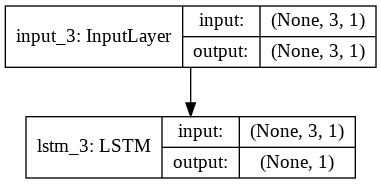

In [11]:
inputs1 = Input(shape=(3,1))
lstm1 = LSTM(1)(inputs1)

model = Model(inputs=inputs1, outputs=lstm1)
plot_model(model, "model.png", show_shapes=True)
Image(filename='model.png')

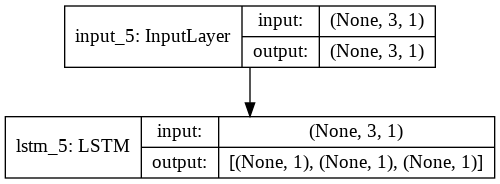

In [16]:
inputs1 = Input(shape=(3,1))
lstm1, state_h, state_c = LSTM(1, return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=[lstm1, state_h, state_c])
plot_model(model, "model.png", show_shapes=True)
Image(filename='model.png')

In [17]:
data = np.array([0.1, 0.2, 0.3]).reshape(1,3,1)
data

array([[[0.1],
        [0.2],
        [0.3]]])

In [18]:
data.shape

(1, 3, 1)

In [19]:
print(model.predict(data))

[array([[-0.04938278]], dtype=float32), array([[-0.04938278]], dtype=float32), array([[-0.09045339]], dtype=float32)]
